In [2]:
import pandas
import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import skimage

In [132]:
im = plt.imread("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2.bmp")
m1 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_fibroblast.mat")
m2 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_epithelial.mat")
m3 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_inflammatory.mat")
m4 = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Classification/img2/img2_others.mat")

n = scipy.io.loadmat("../data/external/CRCHistoPhenotypes_2016_04_28/Detection/img2/img2_detection.mat")


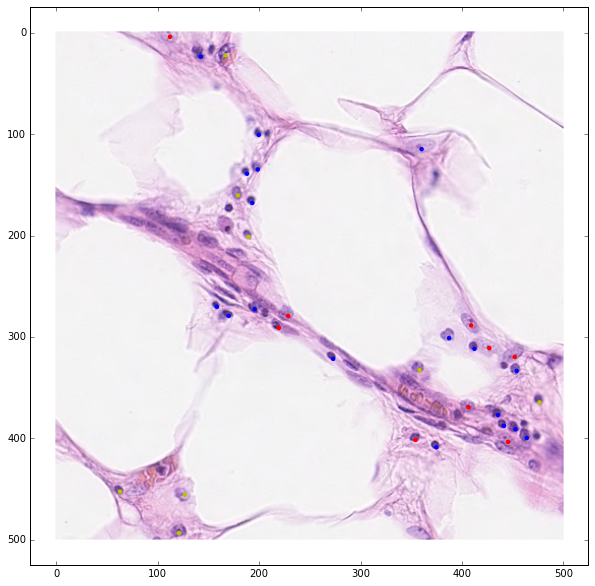

In [133]:
plt.figure(figsize=(10,10))
implot = plt.imshow(im)

plt.scatter(x=m1["detection"][:,0], y=m1["detection"][:,1], c='r', s=20, edgecolors='')
plt.scatter(x=m2["detection"][:,0], y=m2["detection"][:,1], c='g', s=20, edgecolors='')
plt.scatter(x=m3["detection"][:,0], y=m3["detection"][:,1], c='b', s=20, edgecolors='')
plt.scatter(x=m4["detection"][:,0], y=m4["detection"][:,1], c='y', s=20, edgecolors='')
plt.show()

# Extracing patches

In [134]:
def extract_patch(image, patch_center, patch_size=(52,52)):
    patch_y = int(patch_center[0] - patch_size[0]/2)
    patch_x = int(patch_center[1] - patch_size[1]/2)
    
    if patch_y < 0:
        patch_y = 0
    elif patch_y > image.shape[0]-1-patch_size[0]/2:
        patch_y = image.shape[0]-1-patch_size[0]/2
        print "!!", patch_y
        
    if patch_x < 0:
        patch_x = 0
    elif patch_x > image.shape[1]-1-patch_size[1]/2:
        patch_x = image.shape[1]-1-patch_size[1]/2
        print "!!", patch_x
        
        
    patch_image = image[patch_x:patch_x+patch_size[0], patch_y:patch_y+patch_size[1]]
    return patch_image

[ 112.12483487    4.1327609 ]
(52, 52, 3)


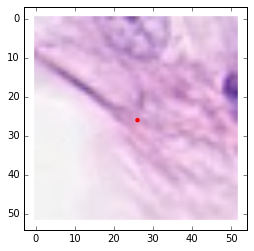

In [136]:
patch_size = (52,52)
pos = m1["detection"][0]
print pos
im_patch = extract_patch(im, pos, patch_size=patch_size)
implot = plt.imshow(im_patch)
print im_patch.shape
plt.scatter(x=patch_size[0]/2, y=patch_size[1]/2, c='r', s=20, edgecolors='')
plt.show()